Bước 1: Khởi động và Khám phá Dữ liệu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

try:
    df = pd.read_csv("customers.csv")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'customer.csv'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

print("5 dòng đầu tiên:")
print(df.head())
print("\nThông tin dữ liệu:")
print(df.info())

5 dòng đầu tiên:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID     

Bước 2: Tiền xử lý Dữ liệu

In [3]:
# Tiền xử lý dữ liệu
df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)

# Lựa chọn các đặc trưng số để phân cụm
X = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDữ liệu sau khi chuẩn hóa:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())


Dữ liệu sau khi chuẩn hóa:
        Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0 -1.054089          -2.093501               -0.428339        -0.791207   
1 -0.983723          -1.656133                1.075546        -0.281162   
2 -1.018906          -0.540845               -1.609962        -0.791207   
3 -0.913356          -1.131292                0.932319        -1.046230   
4 -0.631891          -1.590528               -0.392532        -0.536185   

   Family Size  
0     0.117497  
1    -0.390051  
2    -1.405148  
3    -0.897599  
4     1.132594  


Bước 3: Tìm số cụm tối ưu và Phân cụm

c:\Users\HELIOS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\HELIOS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\HELIOS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\HELIOS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

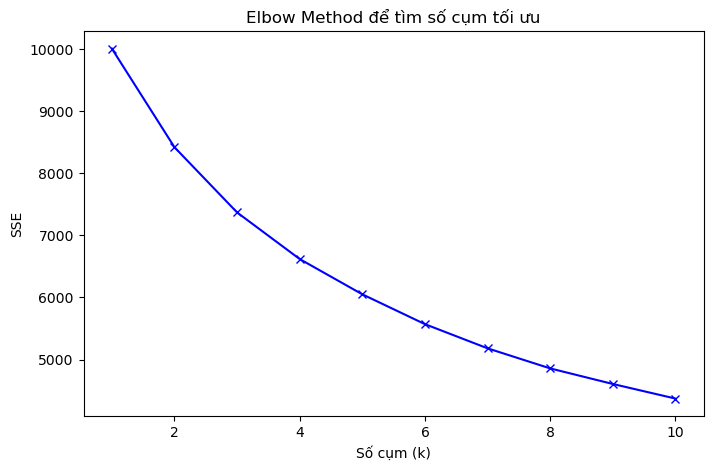

c:\Users\HELIOS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(



Đã phân cụm khách hàng thành 5 nhóm.


In [4]:
# Tìm số cụm tối ưu (k) bằng Elbow Method
sse = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, sse, 'bx-')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Elbow Method để tìm số cụm tối ưu')
plt.show()

# Dựa vào biểu đồ Elbow, chọn k=5 (hoặc giá trị bạn thấy phù hợp)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nĐã phân cụm khách hàng thành {n_clusters} nhóm.")

Bước 4: Phân tích Kết quả

In [5]:
# Phân tích kết quả
cluster_profiles = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income ($)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Work Experience': 'mean',
    'Family Size': 'mean',
    'Gender': lambda x: x.mode()[0]
})
print("\nThông tin trung bình của từng cụm:")
print(cluster_profiles)

# Đánh giá chất lượng phân cụm
silhouette = silhouette_score(X_scaled, df['Cluster'])
ch_score = calinski_harabasz_score(X_scaled, df['Cluster'])
db_score = davies_bouldin_score(X_scaled, df['Cluster'])

print(f"\nSilhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Thông tin trung bình của từng cụm:
               Age  Annual Income ($)  Spending Score (1-100)  \
Cluster                                                         
0        32.268229      133657.091146               46.476562   
1        27.082324       98701.661017               76.772397   
2        54.269129      121610.540897               38.218997   
3        80.402948      120598.176904               67.692875   
4        50.484412       82018.419664               24.784173   

         Work Experience  Family Size  Gender  
Cluster                                        
0               4.263021     6.130208  Female  
1               3.019370     2.602906  Female  
2               9.171504     2.778364  Female  
3               2.828010     4.454545  Female  
4               1.664269     2.978417  Female  

Silhouette Score: 0.156
Calinski-Harabasz Index: 325.863
Davies-Bouldin Index: 1.583


Bước 5: Trực quan hóa Kết quả

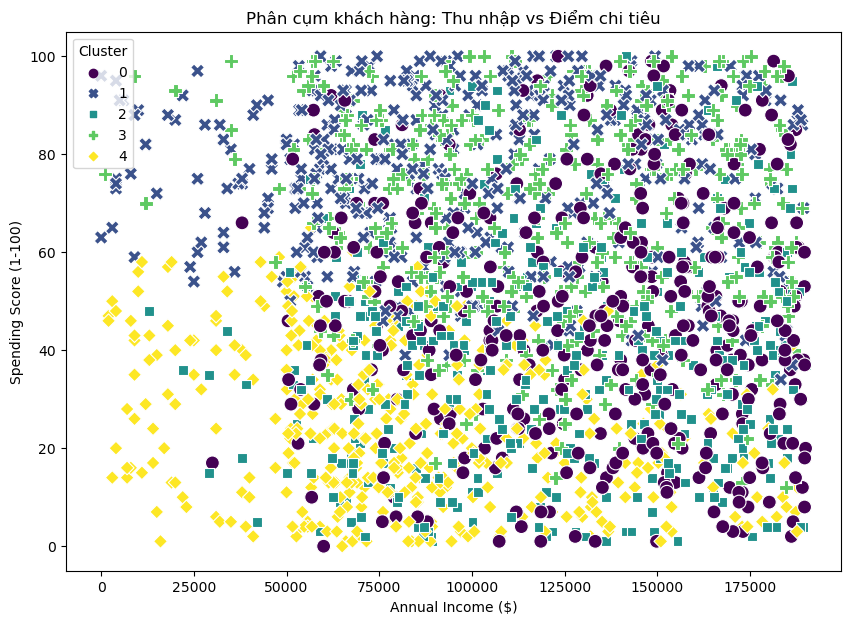


Một vài khách hàng sau khi được phân cụm:
      CustomerID Gender  Age  Annual Income ($)  Spending Score (1-100)  \
1427        1428   Male   37              62893                      29   
257          258   Male   79              73000                      96   
807          808   Male   25              57535                      84   
290          291   Male    9              27000                      62   
1827        1828   Male   95              91352                       9   

         Profession  Work Experience  Family Size  Cluster  
1427      Executive                1            5        4  
257       Homemaker                6            7        3  
807   Entertainment                1            7        0  
290   Entertainment                7            1        1  
1827         Doctor                7            3        2  


In [6]:
# Trực quan hóa kết quả
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', style='Cluster', s=100)
plt.title('Phân cụm khách hàng: Thu nhập vs Điểm chi tiêu')
plt.show()

print("\nMột vài khách hàng sau khi được phân cụm:")
print(df.sample(5))